In [134]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, Conv2D, \
                    Activation, MaxPooling2D,Dropout
from keras.models import Model, Sequential
plt.style.use('fivethirtyeight')

In [100]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [102]:
# reshape our data to be images
y_train = train.label.values
X_train = train.drop("label", 1).as_matrix()\
            .reshape(-1, 28, 28)

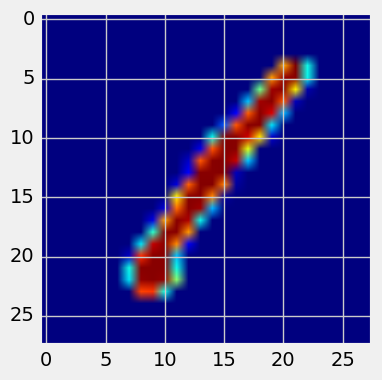

In [103]:
# example from dataset
plt.imshow(X_train[0])

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In [148]:
# data preprocessing and augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10, # 0-10 random rotation
        width_shift_range=0.2, # proportion of horizontal shift
        height_shift_range=0.2,
        rescale=1./255, # divide each pixel by 255 (RGB)
        fill_mode='nearest' # for when we need to create new pixels
)

the ```.flow()``` command below generates batches of randomly transformed images

Label 6


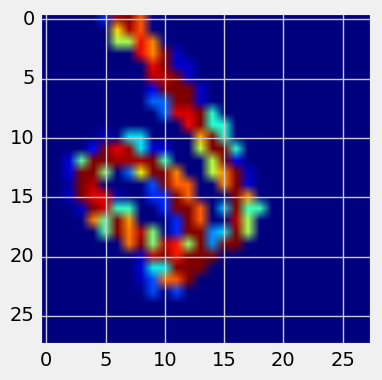

In [105]:
for new_img, label  in datagen.flow(X_train.reshape(-1,28,28,1),y=y_train, batch_size=1):
    print("Label {}".format(label[0]))
    plt.imshow(new_img.reshape(28,28))
    break

Let's start off with a small convnet example that we will train using the data augmentation technique we saw.

In [108]:
# get a validation set
from sklearn.model_selection import train_test_split

one_hot_y = pd.get_dummies(y_train).as_matrix()
X_train = X_train.reshape(-1,28,28,1)

X_train, X_val, y_train, y_val = train_test_split(
         X_train, one_hot_y, test_size=0.33, random_state=42)